In [1]:
import pandas as pd

data = pd.read_csv("2017_world_happiness_resort.csv")
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [3]:
data.describe()


,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


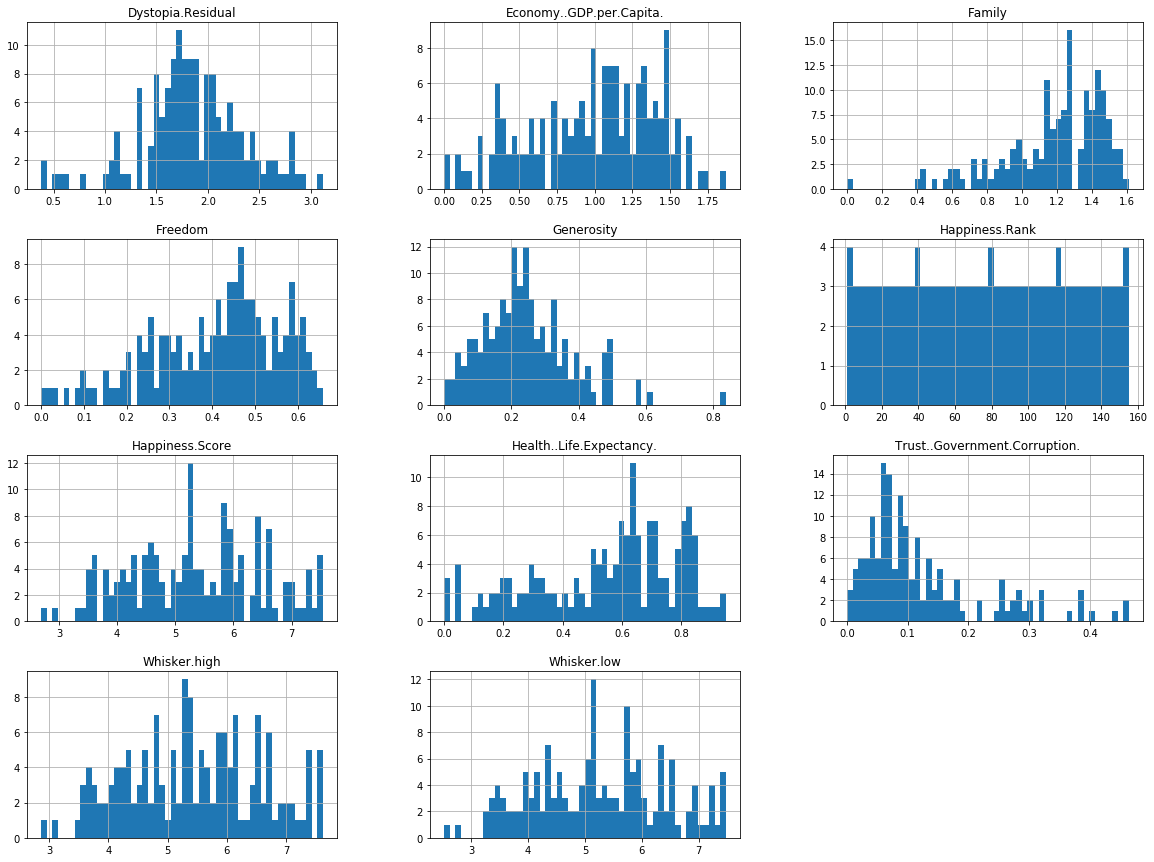

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [5]:
import hashlib
import numpy as np
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]



In [6]:
data_with_id = data.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

In [7]:
print("length of train_set: ", len(train_set))
print("length of test_set: ", len(test_set))

length of train_set:  124
length of test_set:  31


Preparing the data

In [8]:
data = train_set.drop("Happiness.Score", axis=1) # drop labels for training set
data_labels = train_set["Happiness.Score"].copy()

In [9]:
#using Imputer to change 0 (assumed as null input data) to mean instead
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="mean", missing_values = 0)

In [10]:
data_num = data.drop('Country', axis=1)
data_num.head()

,index,Happiness.Rank,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0,1,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1,2,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,2,3,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,3,4,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
6,6,7,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264


In [11]:
imputer.fit(data_num)

SimpleImputer(copy=True, fill_value=None, missing_values=0, strategy='mean',
       verbose=0)

In [12]:
imputer.statistics_

array([76.54471545, 76.92741935,  5.48489634,  5.29194237,  0.98418839,
        1.1988766 ,  0.56192564,  0.41596446,  0.24831369,  0.12197952,
        1.86701326])

In [13]:
data_num.mean().values

array([75.92741935, 76.92741935,  5.48489634,  5.29194237,  0.98418839,
        1.1988766 ,  0.55739398,  0.4126099 ,  0.24631116,  0.12197952,
        1.86701326])

In [14]:
X = imputer.transform(data_num)

In [15]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index = list(data.index.values))

In [16]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean", missing_values = 0))
    ])

data_prepared = num_pipeline.fit_transform(data_num)

In [17]:
data_prepared

array([[7.65447154e+01, 1.00000000e+00, 7.59444482e+00, ...,
        3.62012237e-01, 3.15963835e-01, 2.27702665e+00],
       [1.00000000e+00, 2.00000000e+00, 7.58172806e+00, ...,
        3.55280489e-01, 4.00770068e-01, 2.31370735e+00],
       [2.00000000e+00, 3.00000000e+00, 7.62203047e+00, ...,
        4.75540221e-01, 1.53526559e-01, 2.32271528e+00],
       ...,
       [1.49000000e+02, 1.50000000e+02, 3.59403811e+00, ...,
        1.96896151e-01, 9.56650153e-02, 1.83722925e+00],
       [1.50000000e+02, 1.51000000e+02, 3.54303023e+00, ...,
        2.52756029e-01, 4.55220014e-01, 5.40061235e-01],
       [1.52000000e+02, 1.53000000e+02, 3.46142976e+00, ...,
        3.54256362e-01, 6.60351068e-02, 6.21130466e-01]])

Select and train a model

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.1328323286497782e-15

Fine-Tuning

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)

In [21]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [1.31809987e-14 3.89990234e-15 3.65342668e-15 4.05849919e-15
 4.25858938e-15]
Mean: 5.810283251647979e-15
Standard deviation: 3.690678323370194e-15


Try in the different model because the score is still very small.
Linear Regression model: overfitting?

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [23]:
scores = cross_val_score(tree_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [24]:
display_scores(tree_rmse_scores)

Scores: [0.69651723 0.23169873 0.33700284 0.24933636 0.51897325]
Mean: 0.40670568222416925
Standard deviation: 0.17711338969252907


Try with Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(data_prepared, data_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
forest_scores = cross_val_score(forest_reg, data_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.66467322 0.18330436 0.16247804 0.26295217 0.53964893]
Mean: 0.362611343420296
Standard deviation: 0.2023462213319952


Grid Search CV

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_prepared, data_labels)

c:\users\nipha\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [28]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5040838396899676 {'max_features': 2, 'n_estimators': 3}
0.4548704198951729 {'max_features': 2, 'n_estimators': 10}
0.4641431621902517 {'max_features': 2, 'n_estimators': 30}
0.44864252280645406 {'max_features': 4, 'n_estimators': 3}
0.43803519804761554 {'max_features': 4, 'n_estimators': 10}
0.42590706038461434 {'max_features': 4, 'n_estimators': 30}
0.4244122391568552 {'max_features': 6, 'n_estimators': 3}
0.4278266709927858 {'max_features': 6, 'n_estimators': 10}
0.42141180840452996 {'max_features': 6, 'n_estimators': 30}
0.4139955134413775 {'max_features': 8, 'n_estimators': 3}
0.4168171034197509 {'max_features': 8, 'n_estimators': 10}
0.41874946321308837 {'max_features': 8, 'n_estimators': 30}
0.5060241783278118 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.45683503675958337 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.46572631978920226 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.4262215320493222 {'bootstrap': False, 'max_features'

From Grid Search method, we found that the scores from models of gridCV are larger compared to the normal random forest regressor model. 
    We chose a normal random forest regressor model as our main model.

    Testing with the test set

In [31]:
final_model = forest_reg
#to solve problem about the model is not fit
forest_reg.fit(data_prepared, data_labels)

X_test = test_set.drop("Happiness.Score", axis=1)
y_test = test_set["Happiness.Score"].copy()

X_test_num = X_test.drop('Country', axis=1)
X_test_prepared = num_pipeline.fit_transform(X_test_num)

final_predictions = final_model.predict(X_test_prepared)


final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [32]:
final_rmse

0.18647180949741685